In [ ]:
import nltk
from collections import defaultdict
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
 #select and download stopwords and punkt_tokenizer packages.
#nltk.download()
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
corpus = [
    """
    So she swallowed one of the cakes and was work delighted to find that she
    began shrinking directly. As soon as she was small enough to get through the door,
    she ran out of the house and found quite a crowd of little animals and birds waiting outside.
    They all made a rush at Alice the moment she appeared, but she ran off as hard as 
    she could and soon found herself safe in a thick wood.
    """,
    """
    If two strips of different metals, such as silver and iron, be soldered together
    at one end, and the other ends be connected with a galvanometer, on heating the
    soldered junction of the metals it will be found that a current of electricity
    traverses the circuit from the iron to the work silver. If other metals be used,
    having the same size, and the same degree of heat be applied, the current of
    electricity thus generated will give a greater or a less deflection, which will be
    constant for the metals employed. The two metals generally employed are bismuth
    and antimony, in bars about an inch long and an eighth of an inch square.
    These are soldered together in series so as to present for faces the ends of the
    bars, and these often number as many as fifty pairs. Such a series is called a thermo-pile.
    This method of[25] generating electricity was discovered by Seebeck of Berlin in 1821,
    but the thermo-pile so much in use now in heat investigations was invented by Nobili in 1835.    
    """,
    """
    According to this authority a field testing work laboratory will cost for equipment $250 to $350.
    Such a laboratory can be operated by two or three men at a salary charge of from $100 to $200
    per month. Two men will test on an average four samples per day and each additional man will
    test four more samples. The cost of testing will range from $3 to $5 per sample, which
    is roughly equivalent to 3 cts. per barrel of[Pg 5] cement, or from 3 to 5 cts.per cubic yard
    of concrete. These figures are for field laboratory work reasonably well conducted
    under ordinarily favorable conditions. In large laboratories the cost per sample will
    run somewhat lower.
    """,
    """
    Just then Alice ran across the Duchess (who was now out of prison). She tucked her arm
    affectionately into Alice's and they walked off together. Alice was very glad to find her in
    such a pleasant temper. She was a little startled, however, when she heard the voice of the
    Duchess close to her ear. "You're thinking about something, my dear, and that makes you forget to talk."
    """,
    """
    It was the jackal—Tabaqui, the Dish-licker—and the wolves of India despise Tabaqui because he 
    runs about making mischief, and telling tales, and eating rags and pieces of leather from the 
    village rubbish-heaps. But they are afraid of him too, because Tabaqui, more than 
    anyone else in the jungle, is apt to go mad, and then he forgets that he was ever afraid of
    anyone, and runs through the forest biting everything in his way. Even the tiger runs and
    hides when little Tabaqui goes mad, for madness is the most disgraceful thing that can
    overtake a wild creature. We call it hydrophobia, but they call it dewanee—the madness—and run.
    """,
    """
    A great roofless palace crowned the hill, and the marble of the courtyards and the fountains
    was split, and stained with red and green, and the very cobblestones in the courtyard where the
    king’s elephants used to live had been thrust up and apart by grasses and young trees.
    From the palace you could see the rows and rows of roofless houses that made up the city looking
    like empty honeycombs filled with blackness; the shapeless block of stone that had been an idol
    in the square where four roads met; the pits and dimples at street corners where the public wells
    once stood, and the shattered domes of temples with wild figs sprouting on their sides.
    The monkeys called the place their city, and pretended to despise the Jungle-People because they
    lived in the forest. And yet they never knew what the buildings were made for nor how to use them.
    They would sit in circles on the hall of the king’s council chamber, and scratch for fleas and
    pretend to be men; or they would run in and out of the roofless houses and collect pieces of plaster
    and old bricks in a corner, and forget where they had hidden them, and fight and cry in scuffling crowds,
    and then break off to play up and down the terraces of the king’s garden, where they would shake the
    rose trees and the oranges in sport to see the fruit and flowers fall. They explored all the passages
    and dark tunnels in the palace and the hundreds of little dark rooms, but they never remembered what
    they had seen and what they had not; and so drifted about in ones and twos or crowds telling each
    other that they were doing as men did. They drank at the tanks and made the water all muddy,
    and then they fought over it, and then they would all rush together in mobs and shout:
    "There is no one in the jungle so wise and good and clever and strong and gentle as the Bandar-log."
    Then all would begin again till they grew tired of the city and went back to the tree-tops,
    hoping the Jungle-People would notice them.
    """
]

In [ ]:
# This will contain a list of all words in the corpus
corpus_words = []

# Tokenize a paragraph into sentences and each sentence in to
# words
for c in corpus:
    for sent in sent_tokenize(c):
        word_tokens = word_tokenize(sent)
        corpus_words += word_tokens



In [ ]:
#lowercase
lower_corpus_words = set([ x.lower() for x in corpus_words ])
len(lower_corpus_words)

432

In [ ]:
# Remove the stopwords
from nltk.corpus import stopwords

stwords = set(stopwords.words('english'))

# Using set difference to eliminate stopwords from our words
stopfree_words = lower_corpus_words - stwords
len(stopfree_words)

350

# **Stemming**
Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. 

A stemming algorithm reduces the words `“chocolates”, “chocolatey”, “choco”` to the root word,` “chocolate”` and `“retrieval”, “retrieved”, “retrieves” `reduce to the stem `“retrieve”`.

There is no formulae for stemming instead there are approaches to derive them. In our examples, we use the Snowball Stemmer built in `nltk`.

In [ ]:
from nltk.stem import snowball

stemmer = snowball.SnowballStemmer('english')
stemmed_words = set([stemmer.stem(x) for x in stopfree_words])
len(stemmed_words)

330

In [ ]:
#Constructing the Index

# Our index is a map of word -> documents it is found in
inverted_index = defaultdict(set)  #A function returning the default value for the dictionary defined.

# We maintain the reference to the document by its index in the corpus list
for docid, c in enumerate(corpus):     #Enumerate() method adds a counter to an iterable and returns it in a form of enumerating object. 
    for sent in sent_tokenize(c):
        for word in word_tokenize(sent):
            word_lower = word.lower()
            if word_lower not in stwords:
                word_stem = stemmer.stem(word_lower)
                # We add the document to the set againt the word in our
                # index
                inverted_index[word_stem].add(docid)

len(inverted_index.keys())



330

In [ ]:
#Searching using the index
def process_and_search(query):
    matched_documents = set()
    for word in word_tokenize(query):
        word_lower = word.lower()
        if word_lower not in stwords:
            word_stem = stemmer.stem(word_lower)
            matches = inverted_index.get(word_stem)
            if matches:
                # The operator |= is a short hand for set union
                matched_documents |= matches
    return matched_documents

In [ ]:
process_and_search("dark")

{5}

# **Linear Search**

In [ ]:
#Linear Search
names = ["Tony","Natasha","Thanos","Hulk","Loki"]
target = input("Enter a name to search for")
found = False
for loop in range(0,5):
    if names[loop] == target:
        print("Found target value at position " + str(loop))
        found = True
print("End of search")
if not found:
    print("Target value not in list")

Enter a name to search forThanos
Found target value at position 2
End of search


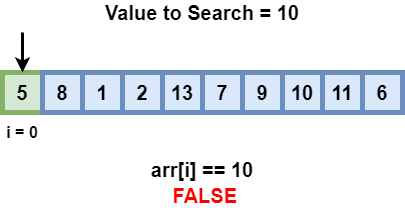